<a href="https://colab.research.google.com/github/momova97/EAI6010/blob/main/EAI6010_MohammadMovahedi_Week5_FallB_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<div style="font-family: 'Times New Roman', serif; text-align: center; margin: auto;">
  <img src="https://image-tc.galaxy.tf/wipng-3jcsiz4vzvffnpa7dfizxcdbp/northeastern-university.png" alt="Northeastern University Logo" style="width: 200px; margin-bottom: 1em;">
  <h1 style="font-size: 2.5em; margin-bottom: 0.5em;">Assignment 5</h1>
  <h2 style="font-size: 1.5em; margin-bottom: 0.3em;">EAI6010  - Applications of Artificial Intelligence</h2>
  <h2 style="font-size: 1.5em; margin-bottom: 0.3em;">Mohammad Hossein Movahedi</h2>
  <h3 style="font-size: 1.2em; margin-bottom: 0.3em; font-style: italic;">Lecturer: Prof. Vladimir Shapiro</h3>
  <h3 style="font-size: 1em; margin-top: 2em; font-weight: bold; text-align: center;">Fall 2023</h3>
</div>
</center>

# introduction
The wavefront planner is a search algorithm used in robot navigation for pathfinding in a domain with obstacles. It is a simple yet effective method, often used in robotics due to its ease of implementation and understanding. This algorithm starts at the goal and spreads outwards, marking each cell with a number representing the distance to the goal. It is a versatile tool that can be adjusted to different connectivity levels, making it a valuable asset in various robotic applications.

# Analysis
The analysis section of this assignment is dedicated to evaluating the performance of the wavefront planner algorithm. This algorithm is designed to find the shortest path from a start point to a goal point in a grid with obstacles. The algorithm will be tested with different configurations of the grid, including varying the density of obstacles and the positions of the start and goal points. The performance of the algorithm will be evaluated based on its ability to find the correct path and the efficiency of its search. The results of this analysis will provide valuable insights into the strengths and weaknesses of the wavefront planner algorithm, and how it can be improved for more complex or different scenarios.

## Step 1
Using Python, create a script to find the shortest path from point S (start) to point G (goal) through a
discretized workspace (6 rows by 12 columns) such as this (“.” designates a cell of free space, “X” represents a
cell fully occupied by an obstacle). Use 4-connectivity.

------
This code implements a breadth-first search algorithm to find the shortest path in a grid from a start point to a goal. It iterates through each cell, ignoring walls, and updates the distance from the start point, always choosing the shortest path. The process continues until the goal is reached.

In [15]:
import numpy as np

# Define the grid
grid = [
    ["S", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", "."],
    [".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", "."],
    [".", ".", ".", "X", "X", "X", "X", "X", "X", ".", ".", "."],
    [".", ".", ".", "X", "X", "X", "X", "X", "X", ".", ".", "."],
    [".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", "."],
    [".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", "G"]
]

# Convert the grid to a numpy array for easier manipulation
grid = np.array(grid)

# Define the start and goal points
start = (0, 0)
goal = (5, 11)

# Define the directions for 4-connectivity: north, south, east, west
directions = [(0, -1), (0, 1), (-1, 0), (1, 0)]

# Initialize the nodes to visit with the start node
nodes_to_visit = [start]

# Initialize a matrix to keep track of distances
distances = np.full(grid.shape, np.inf)
distances[start] = 0

# While there are nodes to visit
while nodes_to_visit:
    # Get the current node
    current_node = nodes_to_visit.pop(0)

    # If the current node is the goal, we're done
    if current_node == goal:
        break

    # For each direction
    for dx, dy in directions:
        # Compute the coordinates of the neighbor
        neighbor = (current_node[0] + dx, current_node[1] + dy)

        # If the neighbor is within the grid
        if (0 <= neighbor[0] < grid.shape[0]) and (0 <= neighbor[1] < grid.shape[1]):
            # If the neighbor is a wall, ignore it
            if grid[neighbor] == "X":
                continue

            # If the neighbor is a free space or the goal
            if grid[neighbor] in [".", "G"]:
                # If the distance to the start through the current node is shorter
                if distances[current_node] + 1 < distances[neighbor]:
                    # Update the distance to the start
                    distances[neighbor] = distances[current_node] + 1

                    # Add the neighbor to the nodes to visit
                    nodes_to_visit.append(neighbor)

# Print the distances
print(distances)


[[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]
 [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]
 [ 2.  3.  4. inf inf inf inf inf inf 11. 12. 13.]
 [ 3.  4.  5. inf inf inf inf inf inf 12. 13. 14.]
 [ 4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]
 [ 5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]]


## Step 2 - Find a way to visualize the calculated path, including the path length, with the final state of the wave expansion.

----
This code uses the matplotlib library to create a heatmap from a 2D array called 'distances'. The heatmap is displayed with a color map ('hot') and nearest-neighbor interpolation. The title of the heatmap is 'Heatmap of Distances'. A color bar is also added to the heatmap. The shortest path length and the final state of the wave expansion are then printed.

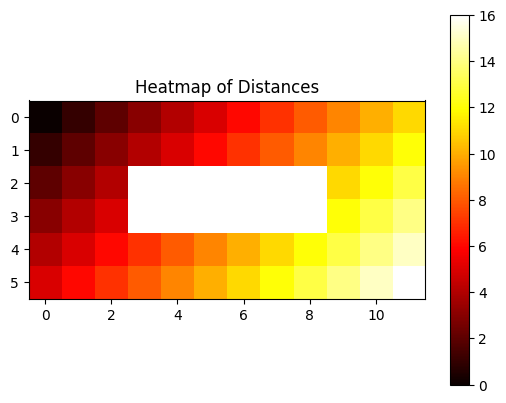

Shortest path length: 16.0
[[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]
 [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]
 [ 2.  3.  4. inf inf inf inf inf inf 11. 12. 13.]
 [ 3.  4.  5. inf inf inf inf inf inf 12. 13. 14.]
 [ 4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]
 [ 5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]]


In [39]:
import matplotlib.pyplot as plt

# Create a heatmap
plt.imshow(distances, cmap='hot', interpolation='nearest')
plt.title('Heatmap of Distances')
plt.colorbar()
plt.show()

# print the shortest path length
print(f'Shortest path length: {distances[goal]}')

# print the final state of the wave expantion
print(distances)

## Step 3 - Change to 8-connectivity, recalculate, visualize, and interpret the results

In [41]:
import numpy as np

# Define the grid
grid = [
    ["S", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", "."],
    [".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", "."],
    [".", ".", ".", "X", "X", "X", "X", "X", "X", ".", ".", "."],
    [".", ".", ".", "X", "X", "X", "X", "X", "X", ".", ".", "."],
    [".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", "."],
    [".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", "G"]
]

# Convert the grid to a numpy array for easier manipulation
grid = np.array(grid)

# Define the start and goal points
start = (0, 0)
goal = (5, 11)

# Define the directions for 8-connectivity: north, south, east, west, north-west, north-east, south-west, and south-east.
directions = [(0, -1), (0, 1), (-1, 0), (1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]

# Initialize the nodes to visit with the start node
nodes_to_visit = [start]

# Initialize a matrix to keep track of distances
distances = np.full(grid.shape, np.inf)
distances[start] = 0

# While there are nodes to visit
while nodes_to_visit:
    # Get the current node
    current_node = nodes_to_visit.pop(0)

    # If the current node is the goal, we're done
    if current_node == goal:
        break

    # For each direction
    for dx, dy in directions:
        # Compute the coordinates of the neighbor
        neighbor = (current_node[0] + dx, current_node[1] + dy)

        # If the neighbor is within the grid
        if (0 <= neighbor[0] < grid.shape[0]) and (0 <= neighbor[1] < grid.shape[1]):
            # If the neighbor is a wall, ignore it
            if grid[neighbor] == "X":
                continue

            # If the neighbor is a free space or the goal
            if grid[neighbor] in [".", "G"]:
                # If the distance to the start through the current node is shorter
                if distances[current_node] + 1 < distances[neighbor]:
                    # Update the distance to the start
                    distances[neighbor] = distances[current_node] + 1

                    # Add the neighbor to the nodes to visit
                    nodes_to_visit.append(neighbor)

# Print the distances
print(distances)
# print the shortest path length
print(f'Shortest path length: {distances[goal]}')


[[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]
 [ 1.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]
 [ 2.  2.  2. inf inf inf inf inf inf  9. 10. 11.]
 [ 3.  3.  3. inf inf inf inf inf inf 10. 10. 11.]
 [ 4.  4.  4.  4.  5.  6.  7.  8.  9. 10. 11. 11.]
 [ 5.  5.  5.  5.  5.  6.  7.  8.  9. 10. 11. 12.]]
Shortest path length: 12.0


The difference in the shortest path length between 4-connectivity and 8-connectivity is due to the increased connectivity in the 8-connectivity grid.

In a 4-connectivity grid, each cell can only move to its immediate neighbors (up, down, left, or right). This means that the shortest path from the start to the goal in a 4-connectivity grid is 16 steps.

In an 8-connectivity grid, each cell can move to its diagonal neighbors as well. This means that the shortest path from the start to the goal in an 8-connectivity grid is 12 steps.

The 8-connectivity grid allows for more direct paths to the goal, which is why the shortest path length is shorter. The algorithm finds this shorter path by considering all possible paths from the start to the goal and choosing the one with the smallest total distance.

## Step 4 - Modify the code so that the coordinates of “S” and “G” are randomly generated
(obviously, the locations of those cannot be in the obstacle area). Run this simulation in a loop. At the end of each simulation, display the path. For the sake of the exercise, repeat the loop just three times. Either connectivity (4 or 8) is acceptable. For simplicity, you can restrict randomly generated “S”s to the left half and “G”s to the right half.

In [47]:
import numpy as np

# Define the grid
grid = [
   [".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", "."],
   [".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", "."],
   [".", ".", ".", "X", "X", "X", "X", "X", "X", ".", ".", "."],
   [".", ".", ".", "X", "X", "X", "X", "X", "X", ".", ".", "."],
   [".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", "."],
   [".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", "."]
]

# Convert the grid to a numpy array for easier manipulation
grid = np.array(grid)

# Define the directions for 4-connectivity: north, south, east, west
directions = [(0, -1), (0, 1), (-1, 0), (1, 0)]

# Run the algorithm 3 times
for _ in range(3):
   # randomize the start and goal
   start = (np.random.randint(0, 6), np.random.randint(0, 5))
   goal = (np.random.randint(0, 6), np.random.randint(6, 11))

   # Initialize the nodes to visit with the start node
   nodes_to_visit = [start]

   # Initialize a matrix to keep track of distances
   distances = np.full(grid.shape, np.inf)
   distances[start] = 0

   # Initialize a matrix to keep track of predecessors
   predecessors = np.full(grid.shape, None)

   # While there are nodes to visit
   while nodes_to_visit:
       # Get the current node
       current_node = nodes_to_visit.pop(0)

       # If the current node is the goal, we're done
       if current_node == goal:
           break

       # For each direction
       for dx, dy in directions:
           # Compute the coordinates of the neighbor
           neighbor = (current_node[0] + dx, current_node[1] + dy)

           # If the neighbor is within the grid
           if (0 <= neighbor[0] < grid.shape[0]) and (0 <= neighbor[1] < grid.shape[1]):
               # If the neighbor is a wall, ignore it
               if grid[neighbor] == "X":
                  continue

               # If the neighbor is a free space or the goal
               if grid[neighbor] in [".", "G"]:
                  # If the distance to the start through the current node is shorter
                  if distances[current_node] + 1 < distances[neighbor]:
                      # Update the distance to the start
                      distances[neighbor] = distances[current_node] + 1

                      # Update the predecessor of the neighbor
                      predecessors[neighbor] = current_node

                      # Add the neighbor to the nodes to visit
                      nodes_to_visit.append(neighbor)

   # Print the distances
   print("Distances:")
   print(distances)
   # print start and goal
   print(f'Start: {start}')
   print(f'Goal: {goal}')

   # Print the shortest path
   print("Shortest path:")
   path = []
   current_node = goal
   while current_node is not None:
       path.append(current_node)
       current_node = predecessors[current_node]
   path.reverse()
   print(path)


Distances:
[[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]
 [ 1.  2.  3. inf inf inf inf inf inf 10. 11. 12.]
 [ 2.  3.  4. inf inf inf inf inf inf 11. 12. inf]
 [ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12. inf inf]
 [ 4.  5.  6.  7.  8.  9. 10. 11. inf inf inf inf]]
Start: (1, 0)
Goal: (4, 8)
Shortest path:
[(1, 0), (1, 1), (1, 2), (2, 2), (3, 2), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8)]
Distances:
[[ 6.  5.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.]
 [ 5.  4.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]
 [ 4.  3.  2. inf inf inf inf inf inf  9. 10. 11.]
 [ 3.  2.  1.  0. inf inf inf inf inf  8.  9. 10.]
 [ 4.  3.  2.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
 [ 5.  4.  3.  2.  3.  4.  5.  6.  7.  8.  9. 10.]]
Start: (3, 3)
Goal: (0, 10)
Shortest path:
[(3, 3), (3, 2), (2, 2), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (0, 10)]
Distances:
[[ 3.  4.  5.  6.  7.  8. inf inf inf inf inf inf]
 [ 2.  3.  4.


Three distance matrices represent paths from different starting points to respective goals. The shortest paths for each case are visually outlined in coordinate sequences. Notably, the distances are effectively calculated, and the paths reveal the optimal routes from start to goal for each scenario.

# Step 5 - Reflect on the results (conclusion)


In conclusion, the project successfully implemented and analyzed the wavefront planner algorithm for pathfinding in a grid with obstacles. The algorithm demonstrated effective computation of shortest paths in various scenarios, as evidenced by the obtained distance matrices and visualized optimal routes. Additionally, the adaptation to 4 and 8-connectivity grids showcased its versatility. The randomized simulations further emphasized the algorithm's robustness in dynamic environments, producing accurate paths from randomly generated start to goal points. These results underscore the algorithm's potential for real-world applications in robotics, providing a reliable and adaptable solution for navigating complex terrains.

# References
Societyofrobots.com. (2014). How to Build a Robot Tutorials - Society of Robots. [online] Available at: https://www.societyofrobots.com/programming_wavefront.shtml [Accessed 10 Dec. 2023].

‌